# Điều gì ảnh hưởng đến tiền tip?

## CÂU HỎI

Đọc dữ liệu tips.csv, thực hiện thống kê mô tả (tìm hiểu các đại lượng và trực quan hóa) để tìm hiểu các yếu tố ảnh hưởng đến tiền tips

## DỮ LIỆU
Gồm các cột
- `total_bill` tổng hóa đơn
- `tip` tiền tip (đơn vị USD)
- `sex` giới tính
- `smoker` người có/không hút thuốc
- `day` ngày trong tuần
- `time` thời điểm
- `size` số lượng người

## TÓM TẮT DỮ LIỆU

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu
df = pd.read_csv('tips.csv')
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Xoá cột 'Unamed: 0'
del df['Unnamed: 0']
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
# Kích thước dữ liệu
df.shape

(244, 7)

In [ ]:
# Thông tin các thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<u>Nhận xét:</u> Dữ liệu có 7 thuộc tính bao gồm:
- Các thuộc tính định lượng: `total_bill`, `tip`, `size`
- Các thuộc tính định tính: `sex`, `smoker`, `day`, `time`

In [ ]:
# Xem các đại lượng thống kê
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


<u>Nhận xét</u>
- `total_bill` trung bình một hoá đơn có giá là $19.78
- `tip` tiền tip trung bình là 2.998 USD, tip thấp nhất là 1 USD và cao nhất là 10 USD
- `sex` và `smoker` chỉ có hai giá trị --> không có bất thường
- `time` chỉ có hai giá trị, có thể dự đoán nhà hàng chỉ phục vụ buổi trưa và buổi tối.

In [ ]:
# Kiểm tra dữ liệu thuộc tính time
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

Như vậy, nhà hàng này không phục vụ ăn tối

Xem phân phối của hai thuộc tính `tip` và `total_tip`

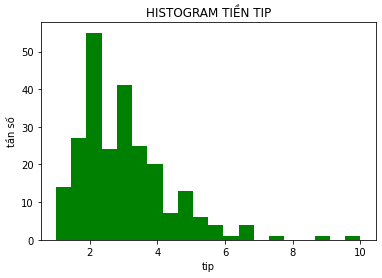

In [ ]:
plt.hist(df['tip'], bins=20, color='green')
plt.xlabel('tip')
plt.ylabel('tần số')
plt.title('HISTOGRAM TIỀN TIP')
plt.show()

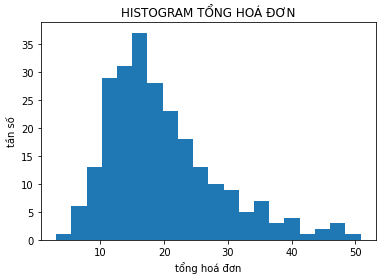

In [ ]:
plt.hist(df['total_bill'], bins=20)

plt.xlabel('tổng hoá đơn')
plt.ylabel('tần số')
plt.title('HISTOGRAM TỔNG HOÁ ĐƠN')

plt.show()

## TÌM HIỂU

### total_bill & tip

Để tìm hiểu hai thuộc tính định lượng có tương quan với nhau hay không, ta có thể dùng hệ số tương quan để kiểm tra. Nội dung về phần này sẽ được trình bày ở bài hồi quy. 

Ta vẫn có thể kiểm tra sự tương quan giữa hai đại lượng này thông qua đồ thị phân tán (scatter plot)

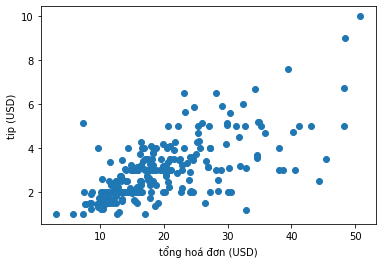

In [ ]:
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('tổng hoá đơn (USD)')
plt.ylabel('tip (USD)')

plt.show()

<u>Nhận xét</u> 
- Khi gía trị hoá đơn bé hơn 23, ta thấy giá trị giữa hoá đơn và tiền tip có quan hệ với nhau, khi hoá đơn tăng thì tiền tip cũng tăng.
- Khi giá trị hoá đơn lớn hơn 23, tính chất này chỉ đúng cho một vài trường hợp.

### sex & tip

Liệu giới tính có ảnh hưởng đến tiền tip hay không?

In [ ]:
# Thử xem giới tính nào tip nhiều tiền hơn
df[['sex', 'tip']].groupby('sex').sum().reset_index()

,sex,tip
0,Female,246.51
1,Male,485.07


Tuy nhiên, kết quả trên chỉ phản ánh  rằng tổng số tiền tip của đàn ông nhiều hơn tổng số tiền tip của phụ nữ trong dữ liệu của nhà hàng mà thôi. Chưa thể khẳng định là giới tính nào hào phóng hơn?

In [ ]:
# Giới tính nào tip nhiều lần hơn
df[['sex', 'tip']].groupby('sex').count().reset_index()

,sex,tip
0,Female,87
1,Male,157


Dữ liệu này cho thấy, số lần đàn ông móc hầu bao gần gấp đôi phụ nữ. Điều này cũng phần nào phản ánh đàn ông hào phóng hơn.

Để so sánh mức độ hào phóng của hai giới ta thử dùng đại lượng trung bình để xem

In [ ]:
# So sánh tiền tip trung bình
man_tip = df.loc[df['sex']=='Male']['tip'].mean()
woman_tip = df.loc[df['sex']=='Female']['tip'].mean()

print('Tiền tip trung bình: ')
print('- Đàn ông: ', man_tip)
print('- Phụ nữ: ', woman_tip)
print('\nChênh lệch: ', man_tip - woman_tip)

Tiền tip trung bình: 
- Đàn ông:  3.0896178343949052
- Phụ nữ:  2.833448275862069

Chênh lệch:  0.2561695585328363


Chênh lệch tiền tip trung bình của hai giới là 0.256 USD, không quá lớn. Điều này có nghĩa là phụ nữ khi tip cũng không quá khác biệt với nam giới, chỉ là ... 

...

phụ nữ ít chịu móc hầu bao hơn thôi.

### smoker & tip

In [ ]:
df[['smoker', 'tip']].groupby('smoker').count().reset_index()

,smoker,tip
0,No,151
1,Yes,93


### day & tip

In [ ]:
day_tip = df[['day', 'tip']].groupby('day').mean().reset_index()
day_tip

,day,tip
0,Fri,2.734737
1,Sat,2.993103
2,Sun,3.255132
3,Thur,2.771452


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


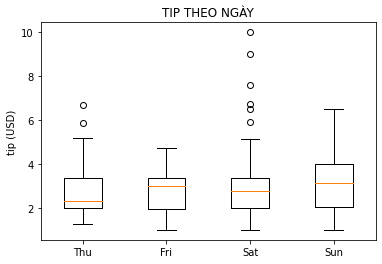

In [ ]:
thu_tip = df.loc[df['day']=='Thur']['tip']
fri_tip = df.loc[df['day']=='Fri']['tip']
sat_tip = df.loc[df['day']=='Sat']['tip']
sun_tip = df.loc[df['day']=='Sun']['tip']

boxplot_data = [thu_tip, fri_tip, sat_tip, sun_tip]
plt.boxplot(boxplot_data)

plt.xticks(range(1, 5), labels=['Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('tip (USD)')
plt.title('TIP THEO NGÀY')

plt.show()

### time & tip

In [ ]:
df[['time', 'tip']].groupby('time').mean().reset_index()

,time,tip
0,Dinner,3.102670
1,Lunch,2.728088


### size & tip

In [ ]:
df[['size', 'tip']].groupby('size').mean().reset_index()

,size,tip
0,1,1.437500
1,2,2.582308
2,3,3.393158
3,4,4.135405
4,5,4.028000
5,6,5.225000
